# Importation des données

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Données

In [ ]:
import pandas as p

df = p.read_csv('./ensae_competition_train.txt', header=[0,1], sep="\t", index_col=0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,180000,1,2,1,47,0,0,0,0,0,...,99694,65977,67415,3700,3700,4100,2360,2500,2618,0
1,110000,2,2,1,35,0,0,0,0,0,...,4869,4966,5070,1053,1073,1081,178,184,185,1
2,70000,2,2,2,22,0,0,0,0,0,...,69927,50579,49483,2501,3001,2608,1777,1792,1793,1
3,200000,2,1,2,27,-2,-2,-2,-2,-2,...,1665,3370,-36,5610,15616,1673,3385,0,95456,0
4,370000,2,1,1,39,0,0,0,0,0,...,48216,47675,48074,2157,2000,1668,2000,3000,1000,0


In [ ]:
len(df)

22500

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [ ]:
#Format des variables : multiindex
print(df[('Y','default payment next month')].value_counts())
print(df['Y']['default payment next month'].value_counts())

0    17520
1     4980
Name: (Y, default payment next month), dtype: int64
0    17520
1     4980
Name: default payment next month, dtype: int64


In [ ]:
df.columns = df.columns.droplevel()
df.rename(columns={'default payment next month':'Y'},inplace=True)


In [ ]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,180000,1,2,1,47,0,0,0,0,0,...,99694,65977,67415,3700,3700,4100,2360,2500,2618,0
1,110000,2,2,1,35,0,0,0,0,0,...,4869,4966,5070,1053,1073,1081,178,184,185,1
2,70000,2,2,2,22,0,0,0,0,0,...,69927,50579,49483,2501,3001,2608,1777,1792,1793,1
3,200000,2,1,2,27,-2,-2,-2,-2,-2,...,1665,3370,-36,5610,15616,1673,3385,0,95456,0
4,370000,2,1,1,39,0,0,0,0,0,...,48216,47675,48074,2157,2000,1668,2000,3000,1000,0


## Distinction des variables catégorielles

In [ ]:
cat_var =  df.columns[1:4] + df.columns[5:11] + df.columns[-1:]

num_var = [v for v in df.columns if v not in cat_var]

print("Categorical variables: ", cat_var)
print("Numerical variables: "  , num_var)

for v in cat_var[:-1]:
    df[v]=p.DataFrame(df[v]).applymap(str)

Categorical variables:  Index(['EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'SEX', 'Y'],
      dtype='object', name='ID')
Numerical variables:  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


/home/athean/anaconda3/envs/ensae/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using '+' to provide set union with Indexes is deprecated, use '|' or .union()
  if __name__ == '__main__':


In [ ]:
num_var_bill = [ v for v in num_var if 'BILL' in v or v == 'LIMIT_BAL']
num_var_pay  = [ v for v in num_var if 'PAY' in v ]
print("Numerical variables BILL: ", num_var_bill)
print("Numerical variables PAY: " , num_var_pay)

Numerical variables BILL:  ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
Numerical variables PAY:  ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


## Variable d'intérêt

In [ ]:
default=df[df['Y']==1]
solvent=df[df['Y']==0]
df['Y'].value_counts()

0    17520
1     4980
Name: Y, dtype: int64

## Statistiques Descriptives

### Variables quantitatives 

In [ ]:
desc=df[num_var].describe()
std=p.DataFrame(df[num_var].std()).transpose()
std.rename(index={0:'std'},inplace=True)
res=p.concat([desc,std])
res

ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000
mean,167031.985778,35.522622,51377.476533,49254.855378,4.719780e+04,43390.913156,40370.602000,38961.910489,5573.344400,5.981831e+03,5159.924000,4783.836400,4761.467022,5319.834311
std,129410.412959,9.240719,73518.931398,70946.251776,6.954210e+04,64346.612034,60746.789532,59597.874685,15467.825328,2.282096e+04,16085.885024,15626.493539,15349.550859,18196.730565
min,10000.000000,21.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3565.000000,3069.250000,2.740000e+03,2350.000000,1763.000000,1253.750000,1000.000000,8.750000e+02,396.000000,300.000000,250.000000,154.000000
50%,140000.000000,34.000000,22578.500000,21365.500000,2.020250e+04,19095.500000,18104.500000,17125.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67254.750000,64252.750000,6.019275e+04,54475.000000,50090.250000,49063.250000,5006.000000,5.000000e+03,4500.000000,4000.000000,4013.250000,4005.000000
max,800000.000000,79.000000,746814.000000,743970.000000,1.664089e+06,628699.000000,823540.000000,699944.000000,505000.000000,1.684259e+06,508229.000000,528897.000000,426529.000000,527143.000000
std,129410.412959,9.240719,73518.931398,70946.251776,6.954210e+04,64346.612034,60746.789532,59597.874685,15467.825328,2.282096e+04,16085.885024,15626.493539,15349.550859,18196.730565


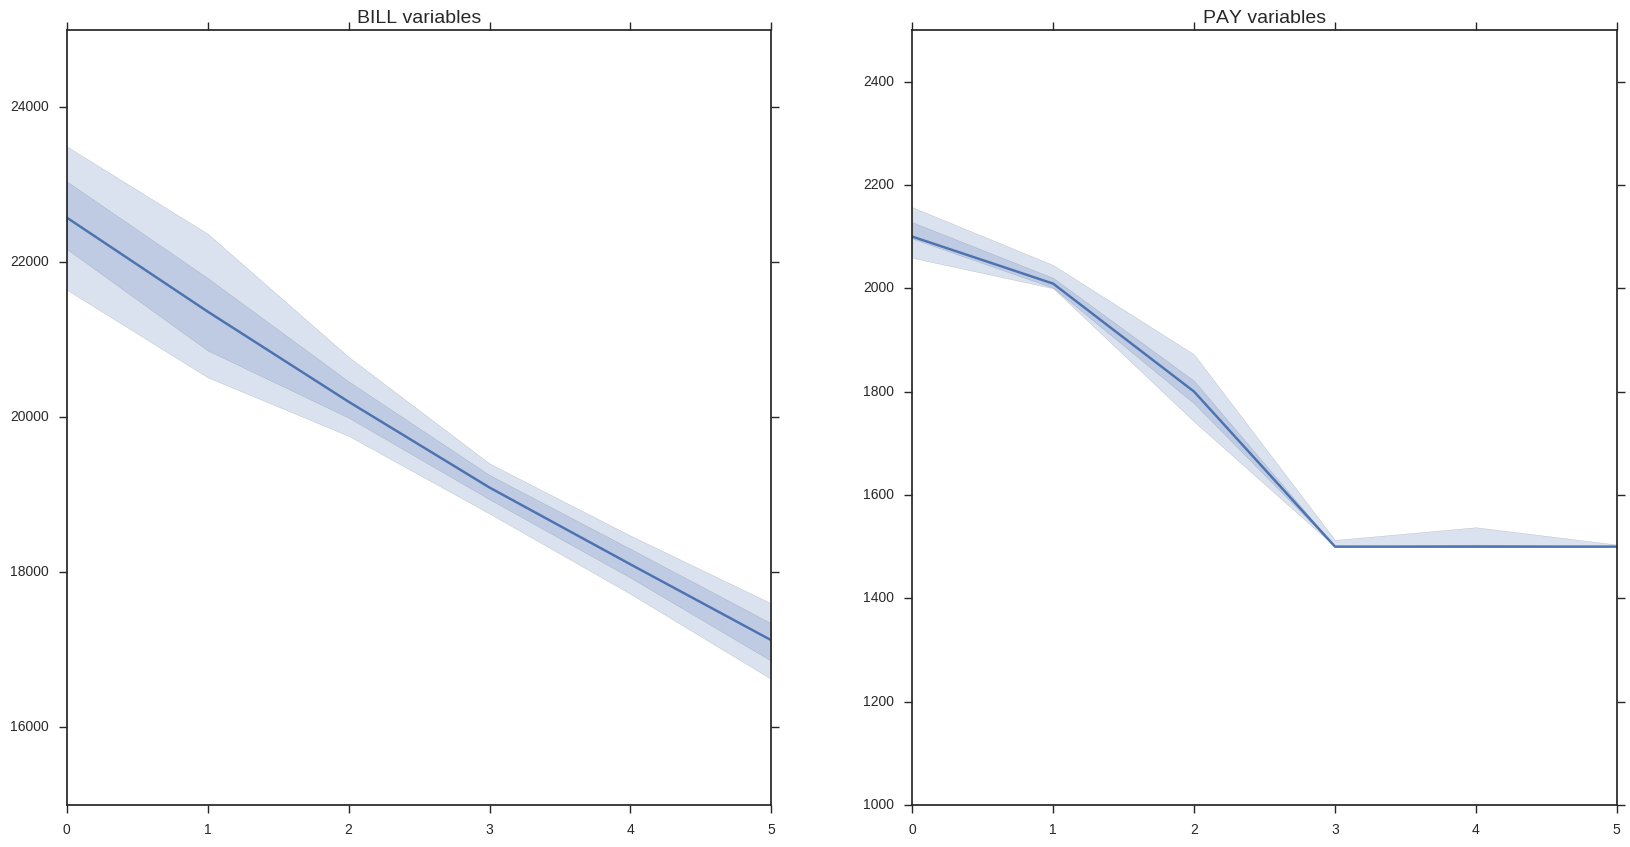

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.set(style="ticks")

ax1.set_ylim([15000,25000])
ax2.set_ylim([1000,2500])

ax1.set_title('BILL variables',fontsize=14)
ax2.set_title('PAY variables',fontsize=14)

sns.tsplot(df[num_var_bill[1:]].values, ci=[68, 95], estimator=np.median, ax=ax1)
sns.tsplot(df[num_var_pay].values, ci=[68, 95], estimator=np.median, ax=ax2)

In [ ]:
desc=default[num_var].describe()
std=p.DataFrame(default[num_var].std()).transpose()
std.rename(index={0:'std'},inplace=True)
p.concat([desc,std])

ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000
mean,128369.012048,35.898594,48802.007430,47508.621486,45354.507631,42269.960040,39794.054418,38482.410843,3235.062450,3389.897992,3449.471888,3089.322490,3048.47751,3508.093173
std,114585.300619,9.785178,73208.224739,70957.968104,68145.557400,64232.730366,61745.867002,59804.195524,7333.004363,11169.855676,13776.576790,10998.148448,10471.88080,13996.188125
min,10000.000000,21.000000,-6676.000000,-17710.000000,-61506.000000,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,50000.000000,28.000000,3351.750000,3099.750000,2574.250000,2302.500000,1475.250000,1168.250000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,90000.000000,34.000000,20738.500000,20715.000000,20105.000000,19344.500000,18661.000000,18254.000000,1642.500000,1573.000000,1242.500000,1000.000000,1000.00000,1000.000000
75%,190000.000000,42.000000,59812.250000,58135.250000,54888.750000,50483.250000,48421.250000,47740.750000,3435.250000,3321.000000,3000.000000,2902.500000,3000.00000,2935.500000
max,720000.000000,75.000000,613860.000000,581775.000000,578971.000000,548020.000000,547880.000000,514975.000000,175100.000000,344467.000000,508229.000000,432130.000000,332000.00000,345293.000000
std,114585.300619,9.785178,73208.224739,70957.968104,68145.557400,64232.730366,61745.867002,59804.195524,7333.004363,11169.855676,13776.576790,10998.148448,10471.88080,13996.188125


In [ ]:
desc=solvent[num_var].describe()
std=p.DataFrame(solvent[num_var].std()).transpose()
std.rename(index={0:'std'},inplace=True)
p.concat([desc,std])

ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,17520.000000,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.000000,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.000000,17520.000000,17520.000000,17520.000000
mean,178021.803653,35.415753,52109.544806,49751.216381,4.772175e+04,43709.540240,40534.483676,39098.206621,6237.993037,6.718579e+03,5646.114155,5265.496176,5248.378425,5834.815525
std,131264.434306,9.077451,73592.642301,70937.100523,6.992702e+04,64377.214009,60460.571694,59540.104394,17028.973430,2.511828e+04,16652.378496,16678.582519,16442.208028,19193.074508
min,10000.000000,21.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,70000.000000,28.000000,3610.750000,3059.750000,2.774000e+03,2368.500000,1830.500000,1261.000000,1170.000000,1.010750e+03,600.000000,390.000000,359.000000,323.000000
50%,150000.000000,34.000000,23100.500000,21571.500000,2.021500e+04,18983.000000,17919.500000,16677.500000,2440.000000,2.244500e+03,2000.000000,1732.500000,1738.500000,1738.000000
75%,250000.000000,41.000000,69197.750000,66165.000000,6.214250e+04,55812.750000,51010.750000,49667.500000,5600.250000,5.363000e+03,5000.000000,4580.000000,4600.000000,4600.000000
max,800000.000000,79.000000,746814.000000,743970.000000,1.664089e+06,628699.000000,823540.000000,699944.000000,505000.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,527143.000000
std,131264.434306,9.077451,73592.642301,70937.100523,6.992702e+04,64377.214009,60460.571694,59540.104394,17028.973430,2.511828e+04,16652.378496,16678.582519,16442.208028,19193.074508


Biais de sélection sur les clients suceptibles de faire défaut ? Ou effet de taille (catégorie moins nombreuse) => moins de chances d'avoir des crédits élevés.

In [ ]:
sample=solvent[num_var].sample(len(default))

desc=sample.describe()
std=p.DataFrame(sample.std()).transpose()
std.rename(index={0:'std'},inplace=True)
p.concat([desc,std])

ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,4980.000000,4980.000000,4980.000000,4980.000000,4.980000e+03,4980.000000,4980.000000,4980.000000,4980.000000,4.980000e+03,4980.000000,4980.000000,4980.000000,4980.000000
mean,177236.947791,35.652610,50778.842570,48572.982932,4.617859e+04,42477.424699,39120.763454,37842.812651,6030.889157,6.354778e+03,5650.963052,5059.842771,5466.581727,5733.646586
std,130474.115281,9.122066,71872.766468,70077.229768,7.061627e+04,62610.366998,58434.612145,57186.616554,17263.670856,2.965805e+04,15641.960136,16230.106285,18155.978283,19097.250382
min,10000.000000,21.000000,-8187.000000,-24704.000000,-2.032000e+04,-81334.000000,-81334.000000,-30177.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,70000.000000,28.000000,3310.750000,2692.250000,2.532750e+03,2177.750000,1760.000000,1140.000000,1119.000000,1.002000e+03,586.750000,370.000000,325.750000,250.000000
50%,150000.000000,34.000000,21992.000000,20452.500000,1.909900e+04,18343.000000,17150.000000,16309.500000,2268.000000,2.203500e+03,2000.000000,1683.000000,1626.000000,1588.000000
75%,250000.000000,42.000000,67429.000000,64049.500000,5.978725e+04,54337.750000,49554.500000,48667.000000,5400.000000,5.173750e+03,4902.750000,4168.500000,4470.750000,4154.500000
max,780000.000000,79.000000,563892.000000,569577.000000,1.664089e+06,563543.000000,471145.000000,471573.000000,423903.000000,1.684259e+06,324097.000000,331788.000000,379267.000000,422000.000000
std,130474.115281,9.122066,71872.766468,70077.229768,7.061627e+04,62610.366998,58434.612145,57186.616554,17263.670856,2.965805e+04,15641.960136,16230.106285,18155.978283,19097.250382


Il semble y avoir un biais de sélection en amont.

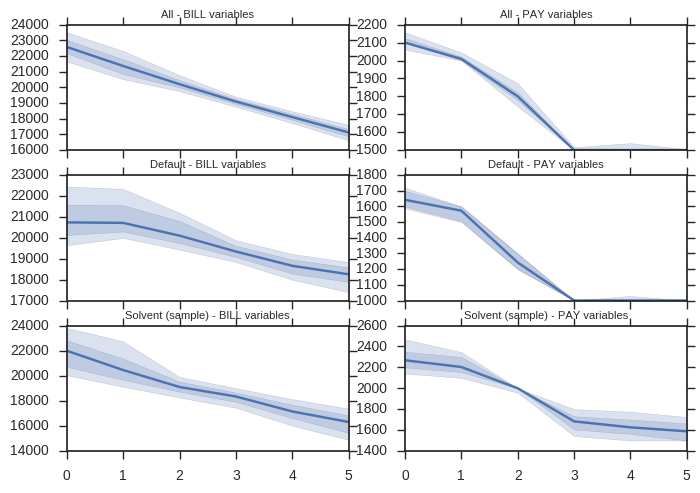

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(3,2, sharex=True)
fig = plt.figure(figsize=(20,10))

sns.set(style="ticks")

df_dict={0: 'All - ', 1 : 'Default - ' , 2 : 'Solvent (sample) - '}
var_dict={0: 'BILL variables', 1 : 'PAY variables'}

for i in range(3):
    for j in range(2):
        axes[i,j].set_title(df_dict[i] + var_dict[j],fontsize=8)

sns.tsplot(df[num_var_bill[1:]].values, ci=[68, 95], estimator=np.median, ax=axes[0,0])
sns.tsplot(df[num_var_pay].values, ci=[68, 95], estimator=np.median, ax=axes[0,1])

sns.tsplot(default[num_var_bill[1:]].values, ci=[68, 95], estimator=np.median, ax=axes[1,0])
sns.tsplot(default[num_var_pay].values, ci=[68, 95], estimator=np.median, ax=axes[1,1])

sns.tsplot(sample[num_var_bill[1:]].values, ci=[68, 95], estimator=np.median, ax=axes[2,0])
sns.tsplot(sample[num_var_pay].values, ci=[68, 95], estimator=np.median, ax=axes[2,1])

In [ ]:
df_resample = p.concat([df[df['Y']==1], df[df['Y']==0].sample(len(df[df['Y']==1]))])

for v in cat_var[:-1]:
    print("Variable {}\n".format(v), p.crosstab(df_resample['Y'],df_resample[v]))

Variable EDUCATION
 EDUCATION  0     1     2    3   4   5   6
Y                                        
0          2  1793  2326  776  16  53  14
1          0  1498  2516  937   7  17   5
Variable MARRIAGE
 MARRIAGE   0     1     2   3
Y                           
0         13  2172  2743  52
1          5  2443  2464  68
Variable PAY_0
 PAY_0   -1   -2     0    1     2    3   4   5  6  7  8
Y                                                     
0      995  497  2778  500   177   20   6   4  1  1  1
1      712  279  1447  901  1371  200  39  12  4  7  8
Variable PAY_2
 PAY_2    -1   -2     0  1     2    3   4   5  6  7
Y                                                 
0      1076  623  2874  5   366   22  10   2  1  1
1       728  497  1903  5  1616  161  43  11  8  8
Variable PAY_3
 PAY_3    -1   -2     0  1     2    3   4  5  6   7  8
Y                                                    
0      1061  680  2834  0   375   22   3  3  1   1  0
1       696  555  2087  1  1469  109  31  9

### Variables numériques (sur un sample d'individus)

In [ ]:
%matplotlib inline

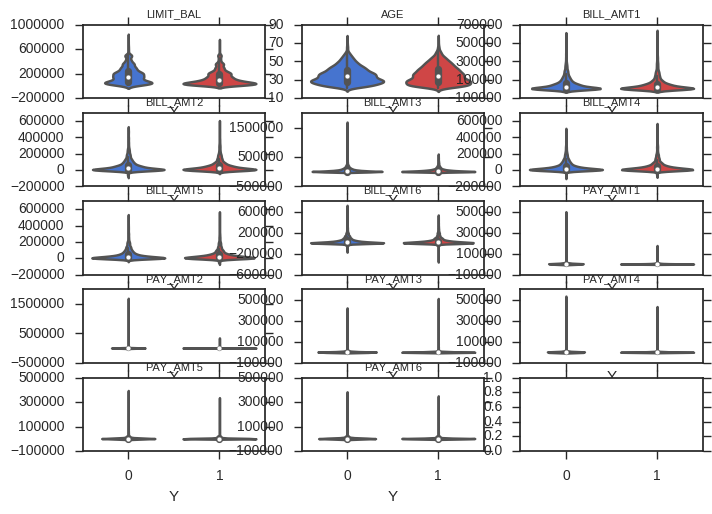

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5,3, sharex=True)

for i in range(5):
    for j in range(3):
        if i*3+j < len(num_var) :
            axes[i,j].set_title(num_var[i*3+j],fontsize=8)
            sns.violinplot(x="Y", y=num_var[i*3+j], \
                        data=df_resample, palette=["#2F6CE6","#E62F2F"],  ax = axes[i,j])
            #sns.stripplot(x="Y", y=num_var[i*3+j], \
            #            data=df_resample, palette=["#2F6CE6","#E62F2F"], jitter=True,  ax = axes[i,j])
            axes[i,j].set_ylabel('')
            yticks=axes[i,j].get_yticks()
            axes[i,j].set_yticks(yticks[::2])

plt.figure(figsize=(20,15))

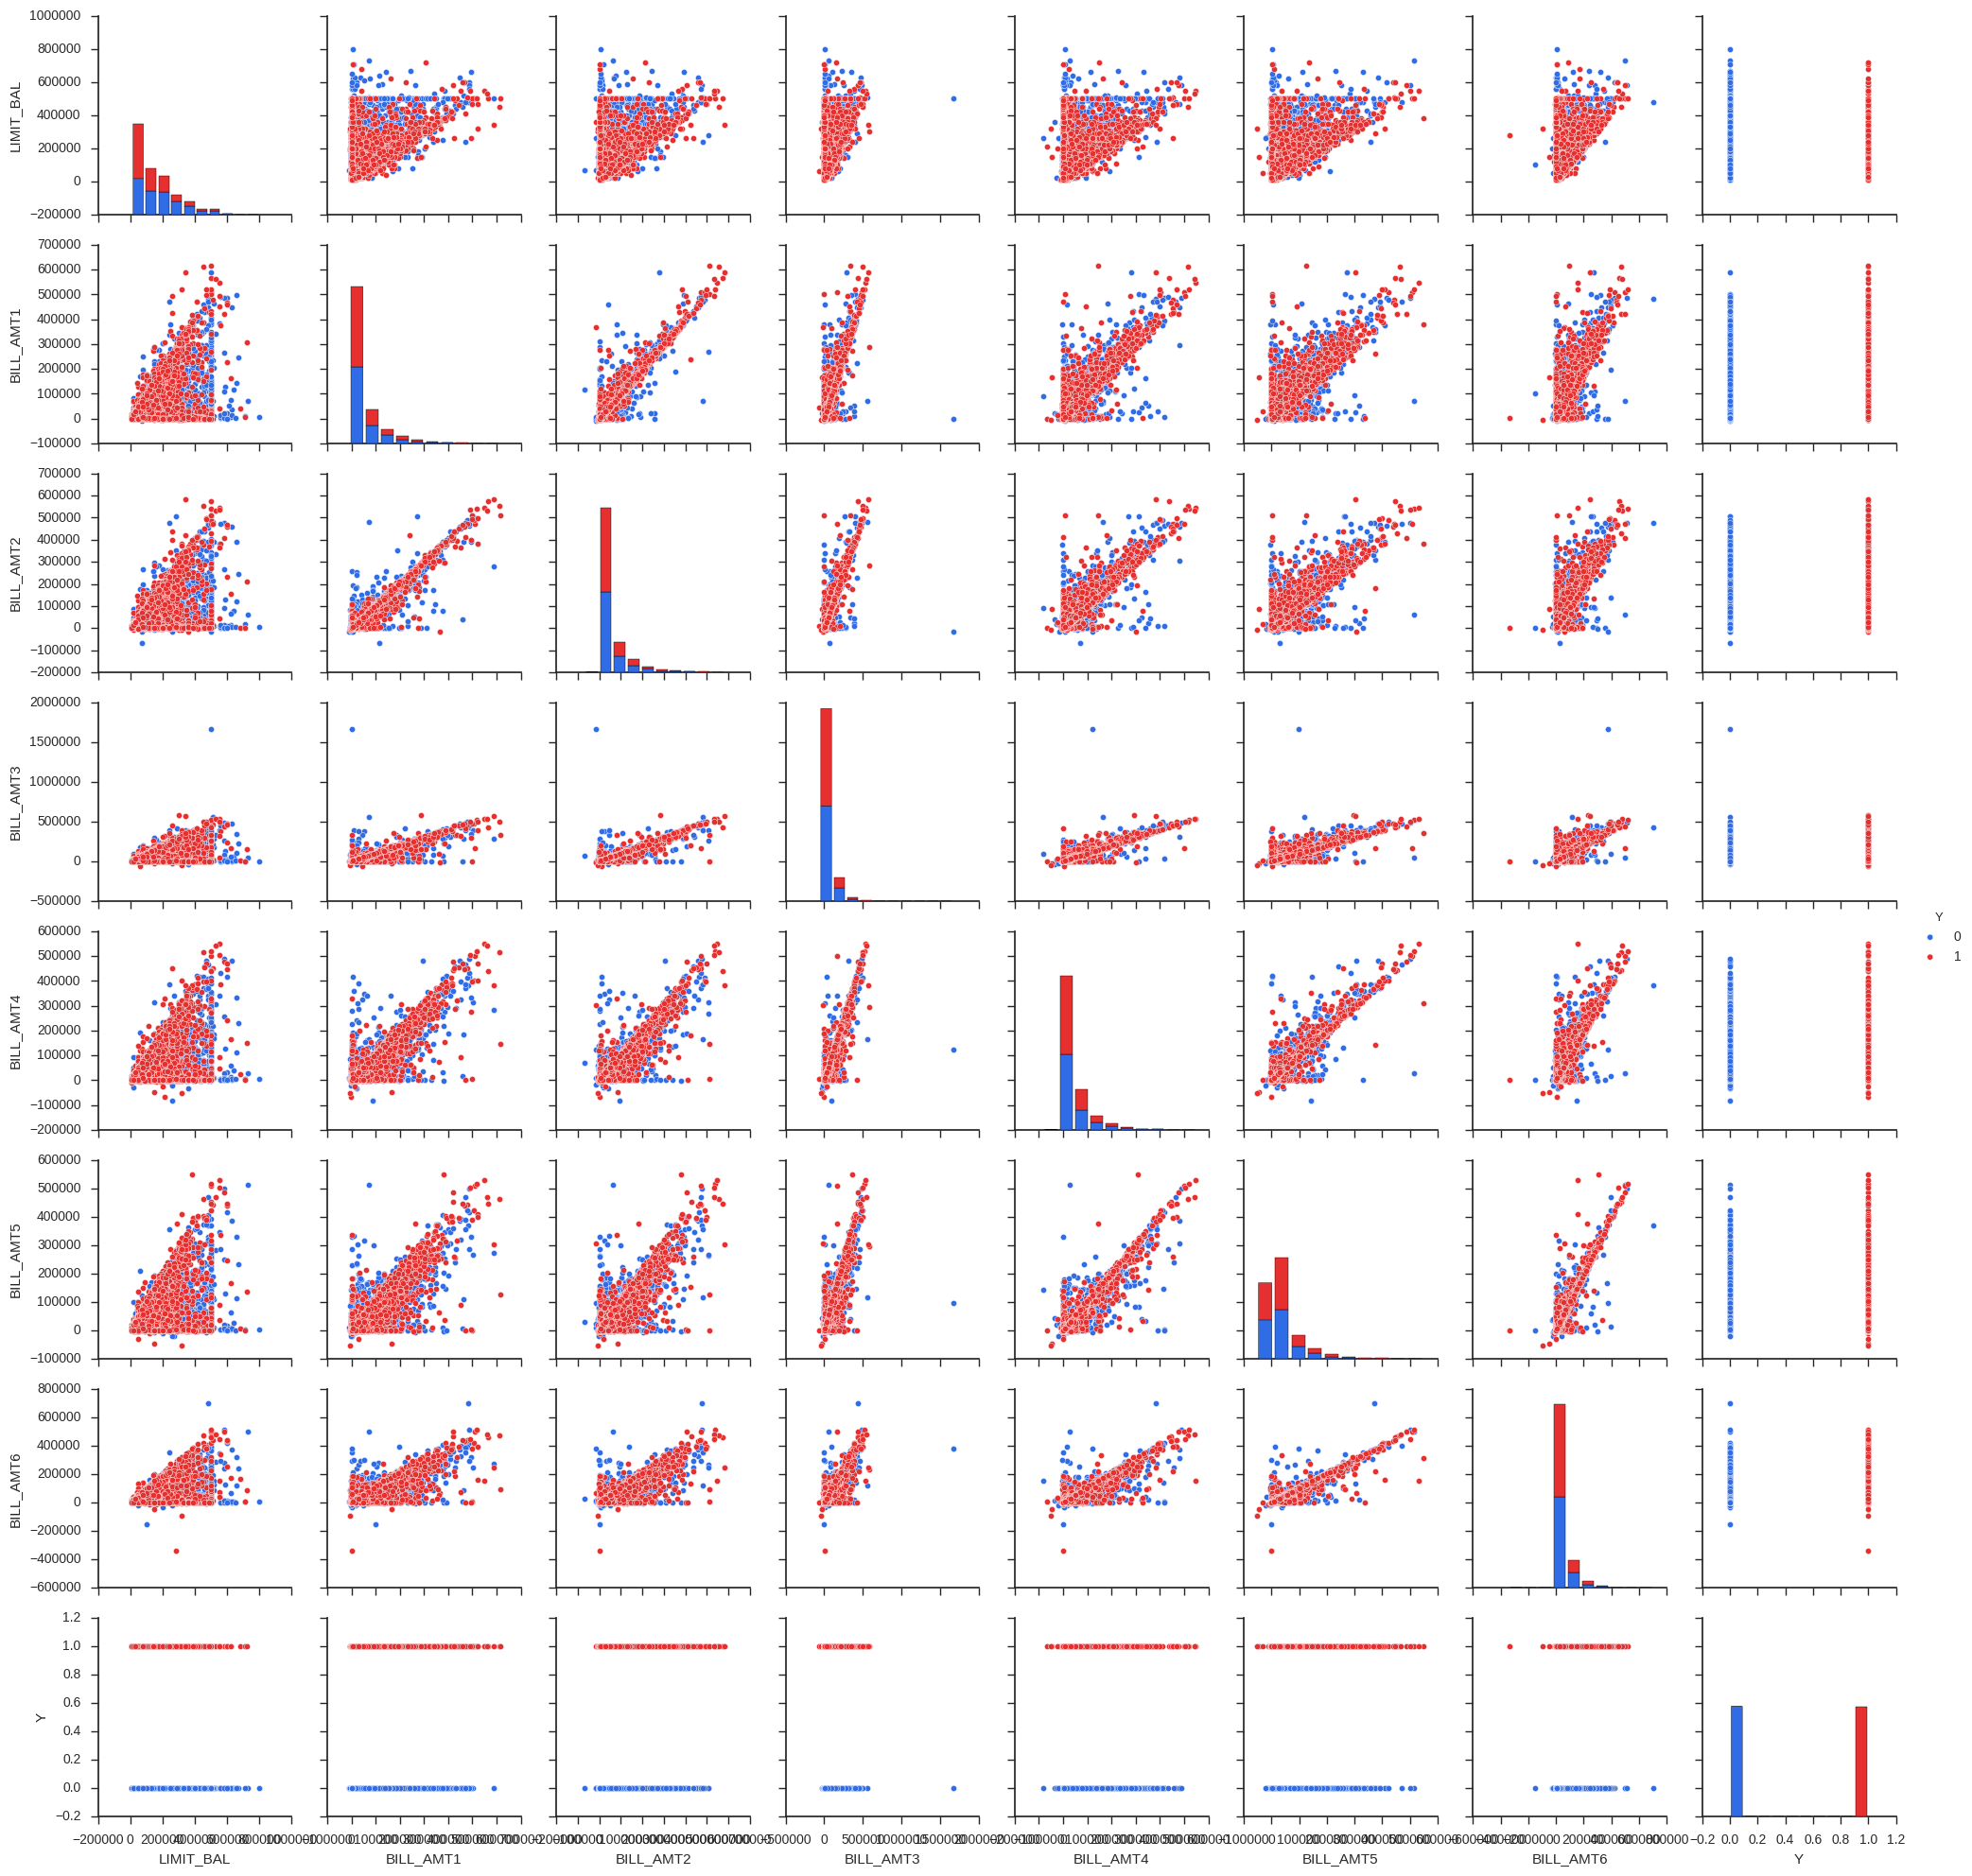

In [ ]:
import seaborn as sns

sns.set(style="ticks")
sns.pairplot(df_resample[num_var_bill + ['Y']],hue='Y',palette=["#2F6CE6","#E62F2F"])

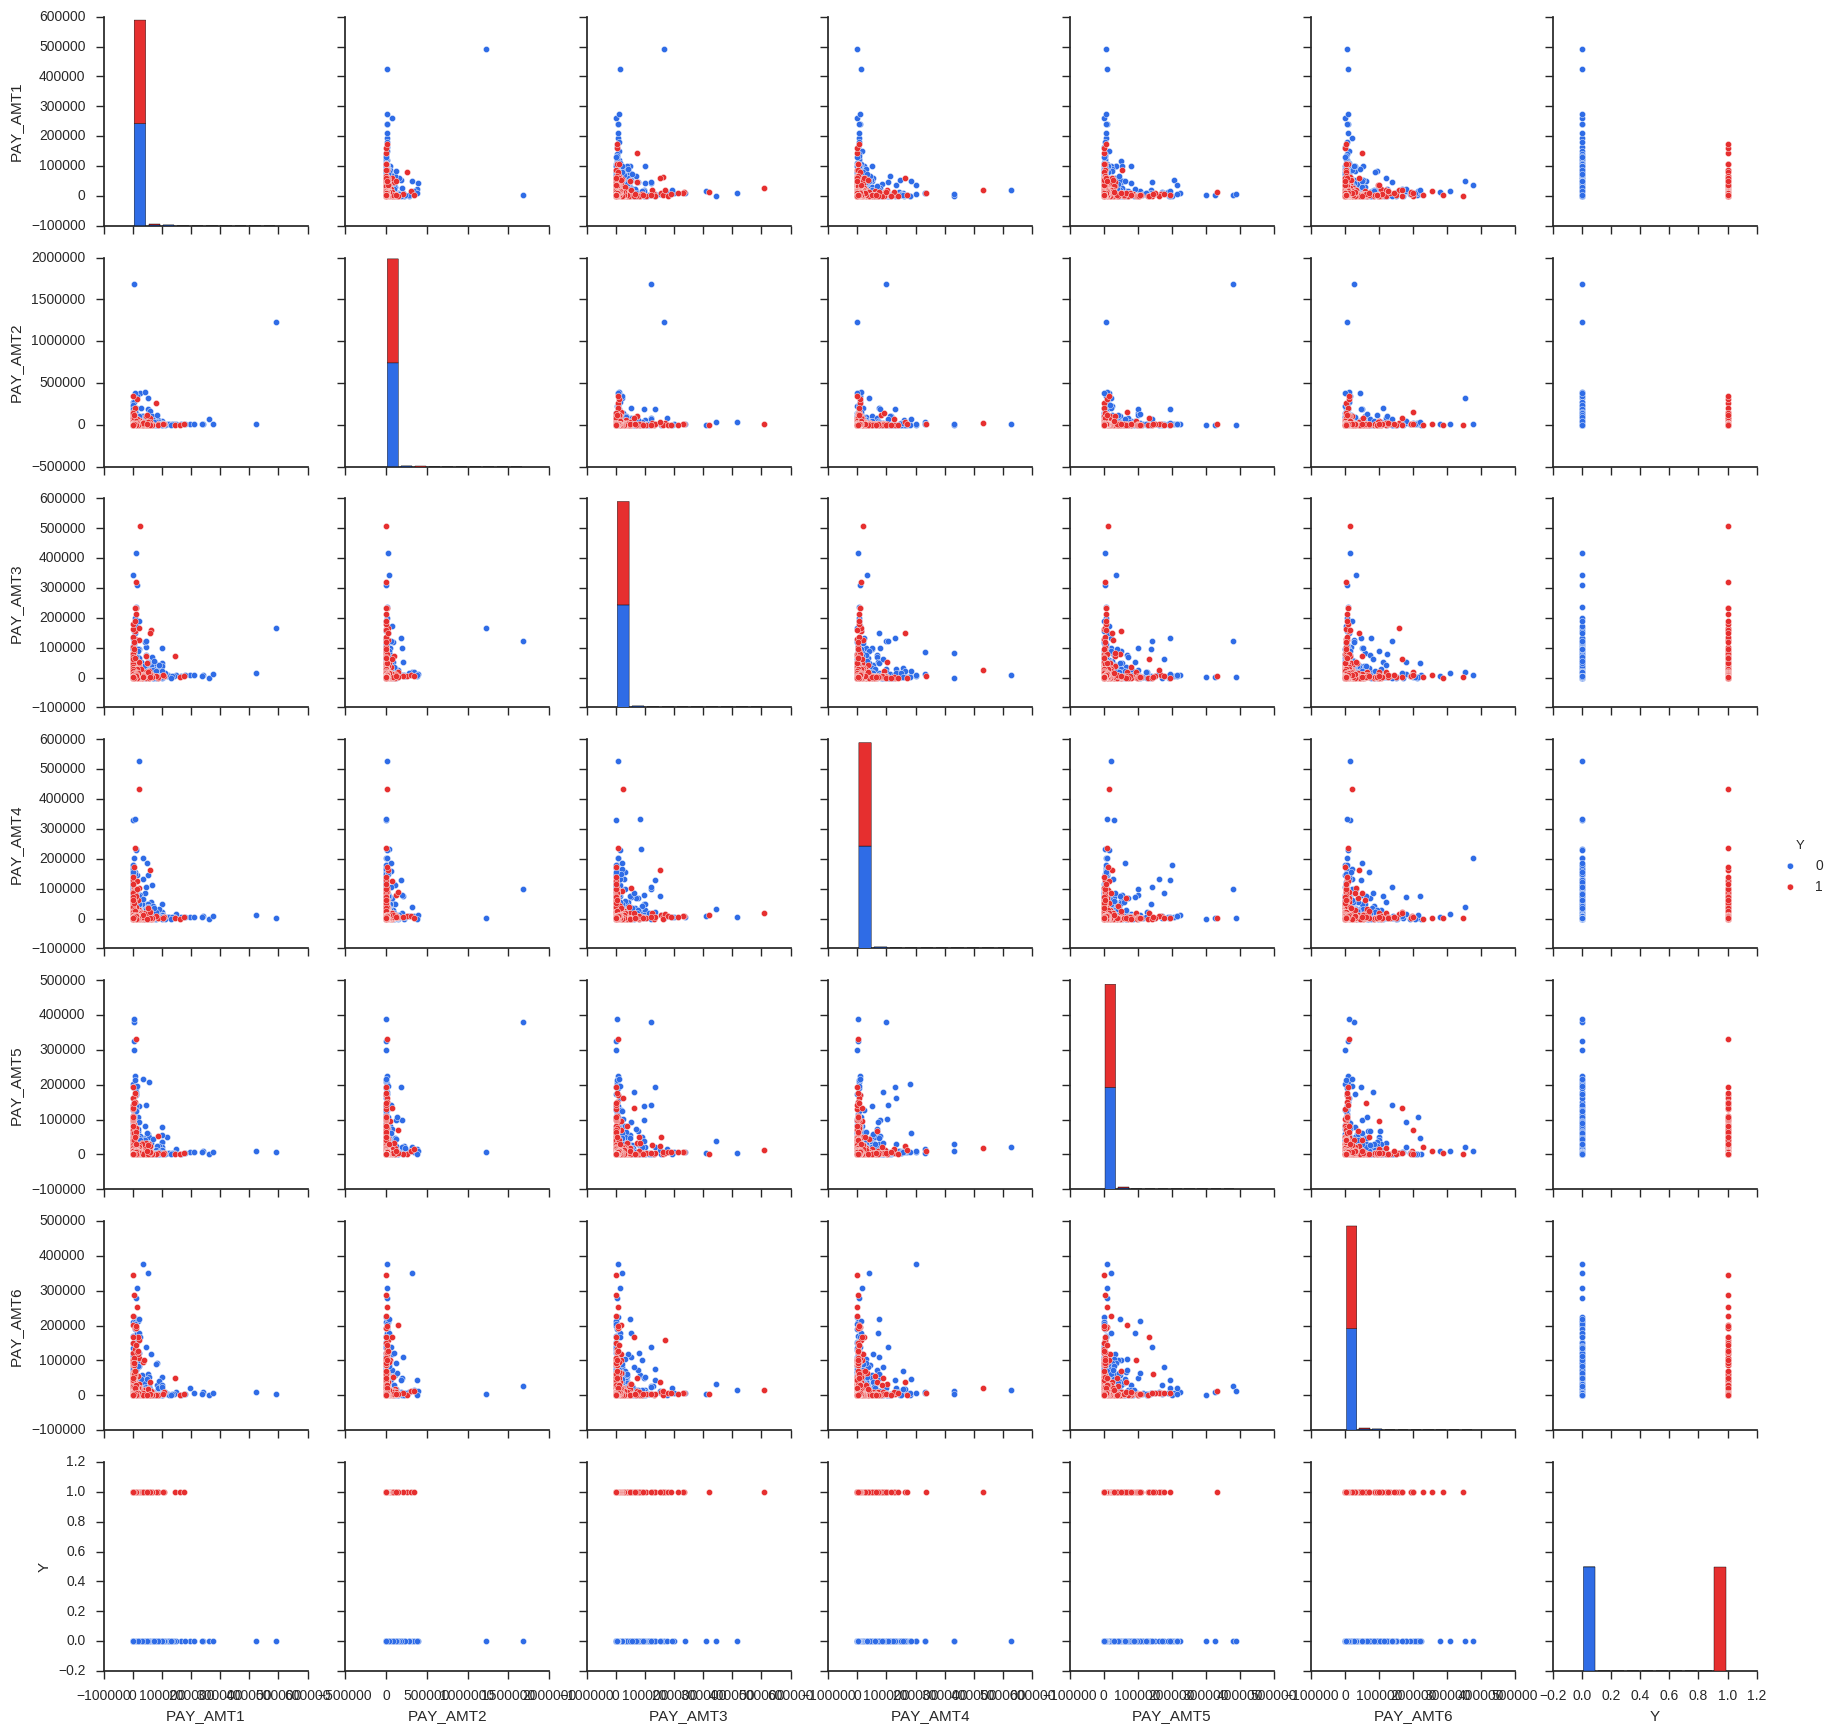

In [ ]:
import seaborn as sns

sns.set(style="ticks")
sns.pairplot(df_resample[num_var_pay + ['Y']],hue='Y',palette=["#2F6CE6","#E62F2F"])

Idées pouvant être explorées : 
 - le default doit pouvoir se repérer dans la décélération des remboursements. 
 - il y a aussi peut etre un effet "biais du survivant" : les users qui sont repérés comme susceptibles d'entraîner un défaut => montant de crédits accordés plus petits. 
 - multicolinéarité de nombreuses variables => faire une ACP au préalable